# __Plot values from data folder__

In [56]:
import numpy as np
import matplotlib.pyplot as plt

## __Dense tests__

In [ ]:
def getMeansAndVars(filenames):
    keys = []
    for a in ["local", "global"]:
        for b in ["noise", "noiseless"]:
            for c in ["dynamic", "static"]:
                for d in ["trc", "error"]:
                    keys += [f"{a}_{b}_{c}_{d}"]

    means = {}
    vars = {}

    for key in keys:
        data_total = np.array([])
        for filename in filenames:
            data_total = np.load(filename)[key] if data_total.size == 0 else  np.vstack((data_total, np.load(filename)[key]))
        means[key] = np.mean(data_total, axis=0)
        vars[key] = np.var(data_total, axis=0)
    
    return means, vars

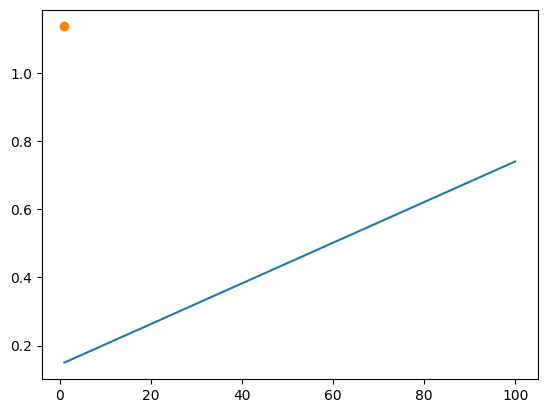

In [65]:
# Dense load
dense_filenames = [f"data/result_dense_test_1.npz", f"data/result_dense_test_2.npz"]
dense_means, dense_vars = getMeansAndVars(dense_filenames)

# Poisson load
poisson_filenames = [f"data/result_poisson_test_1.npz"]
poisson_means, poisson_vars = getMeansAndVars(poisson_filenames)

cs = [1, 1.1, 100]

plt.plot(cs, dense_means["global_noise_dynamic_error"])
plt.plot(1, poisson_means["global_noise_dynamic_error"], 'o')
plt.show()